# Correlation bars of the 3 models WMT budget terms

In [1]:
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
import gcsfs
import numpy as np
import json

In [3]:
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

In [11]:
e = pd.read_csv('/home/jovyan/WMT-project/ECCO-budgets/ecco_budgt_ind', index_col='time')
ss = pd.read_csv('/home/jovyan/WMT-project/SOSE-budgets/sose_budgt_ind', index_col='time')
sd = pd.read_csv('/home/jovyan/WMT-project/SODA/soda_budgt_ind', index_col='time')

In [12]:
e

,dvdt,psi,omega*,ecco,enso,fw_flx,heat_flx,sam,windstress_curl
time,,,,,,,,,
1992-01-15,NaN,NaN,NaN,-1.170194,1.883747,-1.300427,0.001594,-0.122525,-0.219413
1992-02-13,NaN,NaN,NaN,-0.488146,1.786449,-0.869125,-0.867469,-0.885817,1.102549
1992-03-15,NaN,NaN,NaN,0.556974,1.614739,-2.230632,-1.918516,-0.616002,-0.435378
1992-04-14,NaN,NaN,NaN,1.153485,1.408937,-0.181473,0.300216,0.213964,0.524290
1992-05-15,NaN,NaN,NaN,0.758463,1.166296,-0.546701,0.713055,-1.179878,1.575049
...,...,...,...,...,...,...,...,...,...
2015-08-15,1.395031,0.980479,-0.241854,0.559372,2.045500,0.225318,-0.579957,1.083196,-1.076998
2015-09-14,2.642567,1.705306,0.198210,0.380170,2.336527,-0.677235,-0.413434,1.039752,-0.643988
2015-10-15,2.116256,1.567715,0.032802,0.957576,2.599419,0.302553,-0.738937,-0.384399,1.538923


In [13]:
ecco = e.corr()
sose = ss.corr()
soda = sd.corr()

In [20]:
soda.iloc[:, :3]

,dvdt,psi,omega
dvdt,1.000000,-0.118190,0.972394
psi,-0.118190,1.000000,-0.346638
omega,0.972394,-0.346638,1.000000
soda,-0.185393,0.448088,-0.280423
enso,-0.175301,0.277924,-0.230903
sam,0.051816,0.059293,0.035012


In [21]:
soda.iloc[2, 1]

-0.346638197010356

In [23]:
ecco_dvdt_psi = ecco.iloc[0, 1]
ecco_dvdt_omega = ecco.iloc[0, 2]
ecco_psi_omega = ecco.iloc[2, 1]

sose_dvdt_psi = sose.iloc[0, 1]
sose_dvdt_omega = sose.iloc[0, 2]
sose_psi_omega = sose.iloc[2, 1]

soda_dvdt_psi = soda.iloc[0, 1]
soda_dvdt_omega = soda.iloc[0, 2]
soda_psi_omega = soda.iloc[2, 1]

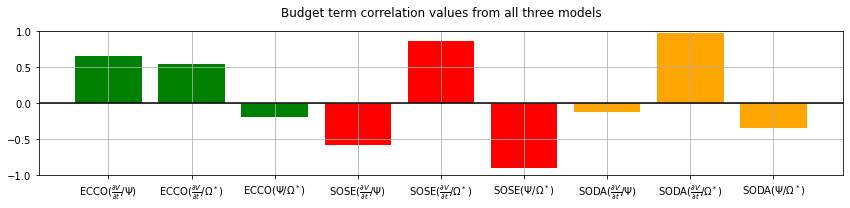

In [30]:
fig, ax = plt.subplots(1,1, figsize=(12,3))

ax.bar(x=r'ECCO($\frac{\partial V}{\partial t}/\Psi$)', height = ecco_dvdt_psi, color='green')
ax.bar(x=r'ECCO($\frac{\partial V}{\partial t}/\Omega^*$)', height = ecco_dvdt_omega, color='green')
ax.bar(x=r'ECCO($\Psi/\Omega^*$)', height= ecco_psi_omega, color='green')

ax.bar(x=r'SOSE($\frac{\partial V}{\partial t}/\Psi$)', height = sose_dvdt_psi, color='red')
ax.bar(x=r'SOSE($\frac{\partial V}{\partial t}/\Omega^*$)', height = sose_dvdt_omega, color='red')
ax.bar(x=r'SOSE($\Psi/\Omega^*$)', height= sose_psi_omega, color='red')

ax.bar(x=r'SODA($\frac{\partial V}{\partial t}/\Psi$)', height = soda_dvdt_psi, color='orange')
ax.bar(x=r'SODA($\frac{\partial V}{\partial t}/\Omega^*$)', height = soda_dvdt_omega, color='orange')
ax.bar(x=r'SODA($\Psi/\Omega^*$)', height= soda_psi_omega, color='orange')

ax.axhline(y=0, color='k')
ax.set_title(r'Budget term correlation values from all three models', fontsize=12, pad=15)
ax.set_ylabel('')
ax.grid()
ax.set_ylim(-1,1)
plt.tight_layout();